<h3><b>Import Module</h3>

In [1241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering

<h3><b>Data Cleaning</h3>

In [1242]:
df = pd.read_csv('https://raw.githubusercontent.com/Keipatr/Customer-Analysis-Clustering/main/customer_analysis.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1243]:
# Check missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


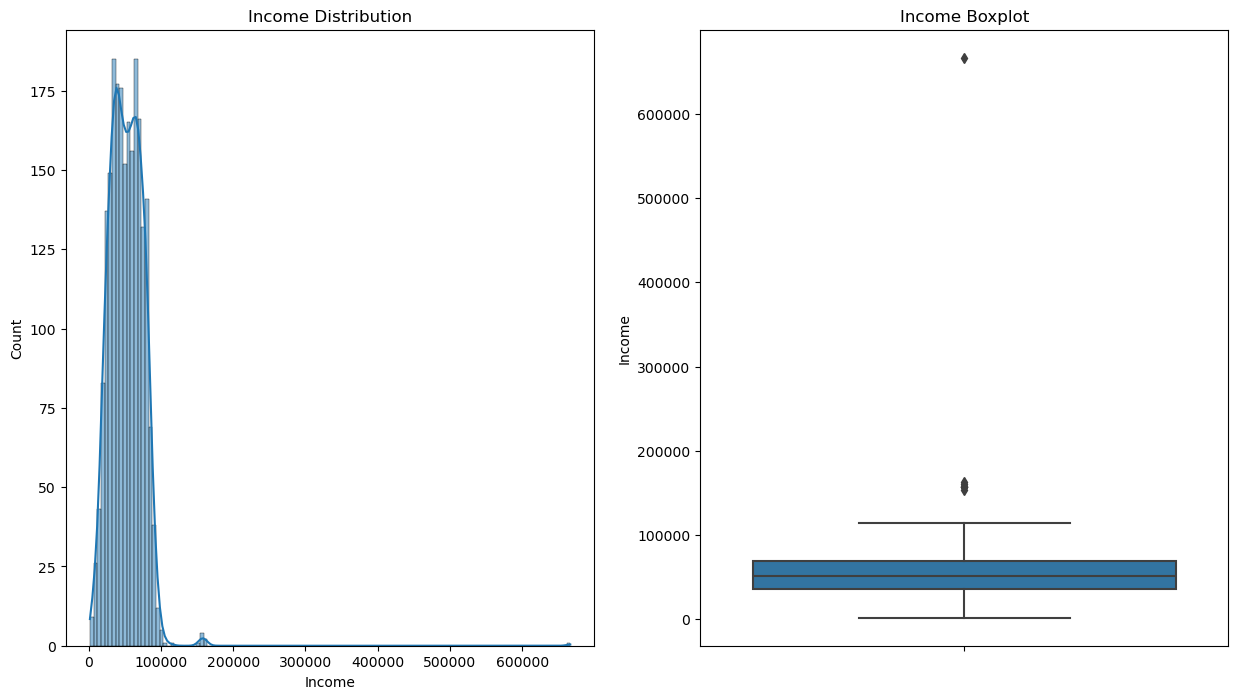

In [1244]:
# to show the distribution of income
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Income'])
plt.title('Income Boxplot')
plt.show()

In [1245]:
# fill the na with median because there is some customer that have higher income 
df['Income'].fillna(df['Income'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1246]:
# change dt_customer to date time format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [1247]:
# categorical features
print(df['Education'].value_counts())
print('\n')
print(df['Marital_Status'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


<h3><b>Feature Enginering</h3>

In [1248]:
df['Age'] =  datetime.now().year - df['Year_Birth']
df[['Year_Birth', 'Age']].head()

,Year_Birth,Age
0,1957,66
1,1954,69
2,1965,58
3,1984,39
4,1981,42


In [1249]:
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df[['Spent','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head()

,Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15


In [1250]:
df['Living_With'] = df["Marital_Status"].replace({"Absurd":"Alone",
                                                  "Widow":"Alone",
                                                  "YOLO":"Alone",
                                                  "Divorced":"Alone", 
                                                  "Single":"Alone",
                                                  "Married":"Partner",
                                                  "Together":"Partner"})
df[['Marital_Status', 'Living_With']].head()

,Marital_Status,Living_With
0,Single,Alone
1,Single,Alone
2,Together,Partner
3,Together,Partner
4,Married,Partner


In [1251]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df[['Children', 'Teenhome', 'Kidhome']].head()

,Children,Teenhome,Kidhome
0,0,0,0
1,2,1,1
2,0,0,0
3,1,0,1
4,1,0,1


In [1252]:
df['Family_Size'] = df['Children'] + df['Living_With'].apply(lambda x: 2 if x == 'Partner' else 1)
df[['Living_With', 'Children', 'Family_Size']].head()

,Living_With,Children,Family_Size
0,Alone,0,1
1,Alone,2,3
2,Partner,0,2
3,Partner,1,3
4,Partner,1,3


In [1253]:
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)
df[['Children', 'Is_Parent']].head()

,Children,Is_Parent
0,0,0
1,2,1
2,0,0
3,1,1
4,1,1


In [1254]:
df['Education'] = df['Education'].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})
df[['Education']].head()


,Education
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,Postgraduate


In [1255]:
# drop redundant columns, primary id, zero variance, and categorized becayse feature enginering
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Kidhome", "Teenhome"], axis=1)


In [1256]:
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,Alone,0,1,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,Alone,2,3,1
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,Partner,0,2,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,Partner,1,3,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,Partner,1,3,1


<h3><b>Data Preparation</h3>

In [1257]:
# encode categorical features
label_encoder = LabelEncoder()
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])
df['Education'] = label_encoder.fit_transform(df['Education'])

In [1258]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.894974,0.235696,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,...,-0.262111,-0.11651,-0.097282,2.388846,0.985345,1.679417,-1.346874,-1.264505,-1.759115,-1.584605
1,-0.894974,-0.235454,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,-1.346874,1.396361,0.446548,0.631072
2,-0.894974,0.773999,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,...,-0.262111,-0.11651,-0.097282,-0.418612,0.317643,0.282673,0.742460,-1.264505,-0.656283,-1.584605
3,-0.894974,-1.022355,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,0.742460,0.065928,0.446548,0.631072
4,0.568341,0.241888,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,0.742460,0.065928,0.446548,0.631072


In [1259]:
# Dimensionality Reduction using pca
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['col1', 'col2'])

<h3><b>Clustering<h3>

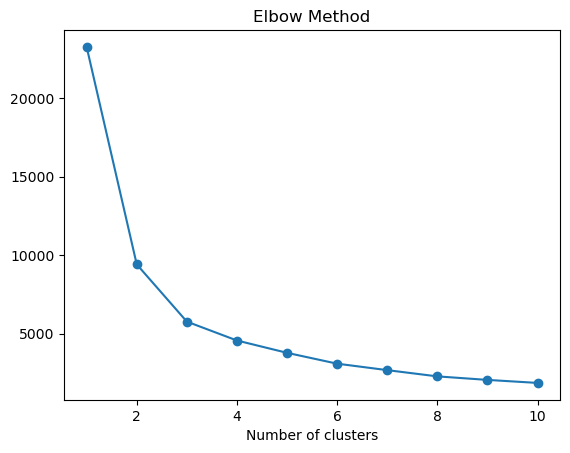

In [1260]:
# elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, max_iter=500, random_state=9)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [1261]:
findknee = KneeLocator(range(1, 11),
                       wcss,
                       curve="convex",
                       direction="decreasing")

print('best cluster:', findknee.elbow)

best cluster: 3


In [1262]:
# agglomerative clustering
ac = AgglomerativeClustering(n_clusters=3)
df_pca['Clusters'] = ac.fit_predict(df_pca)
df["Clusters"]=  ac.fit_predict(df_pca)

e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


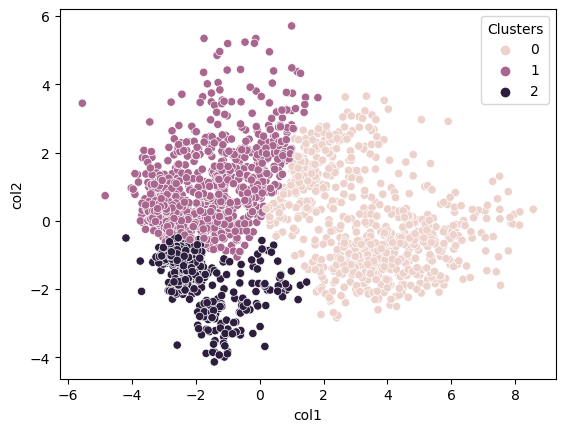

In [1263]:
sns.scatterplot(data=df_pca, x='col1', y='col2', hue='Clusters')
plt.show()

<h3><b>Visualization<h3>

e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

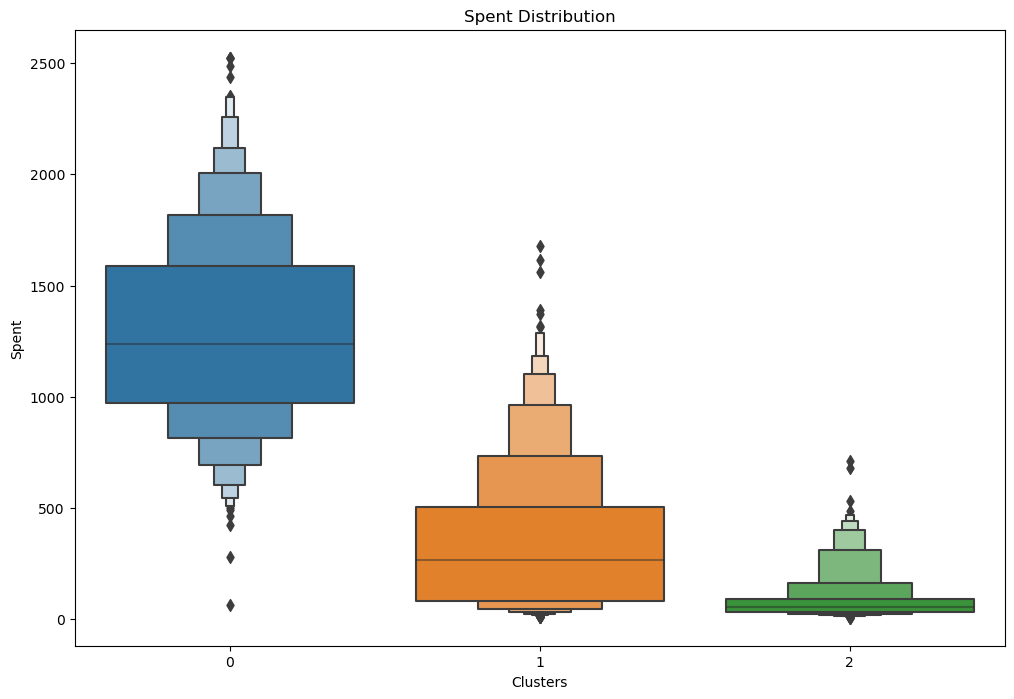

In [1264]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['Clusters'], y=df['Spent'])
plt.title('Spent Distribution')
plt.show()


e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

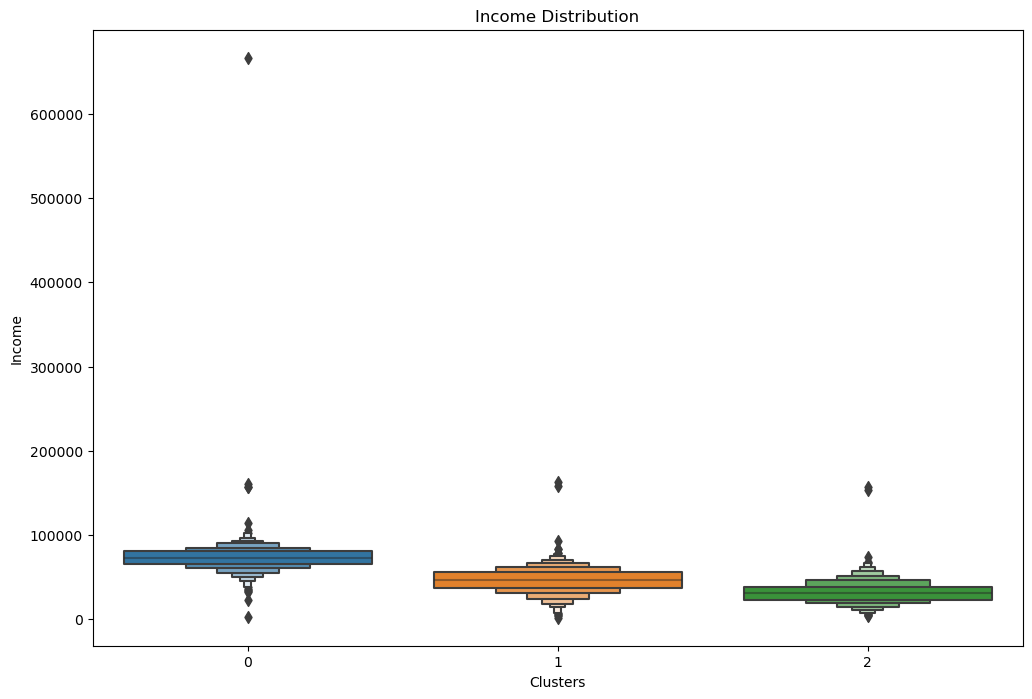

In [1265]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df['Clusters'], y=df['Income'])
plt.title('Income Distribution')
plt.show()


e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

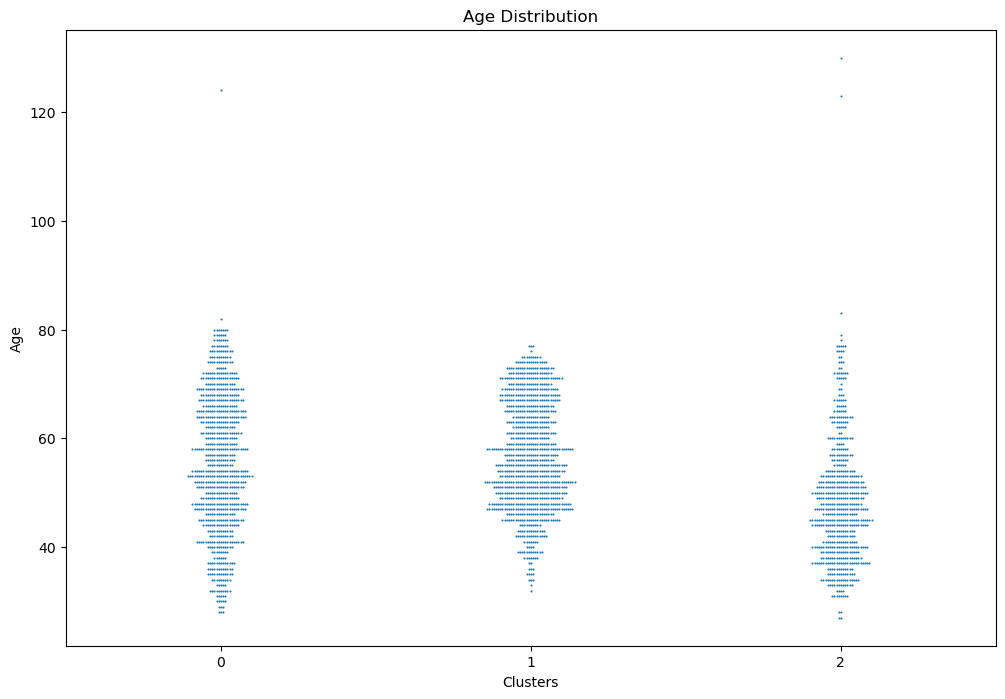

In [1266]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x=df['Clusters'], y=df['Age'], size =1.5)
plt.title('Age Distribution')
plt.show()

e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


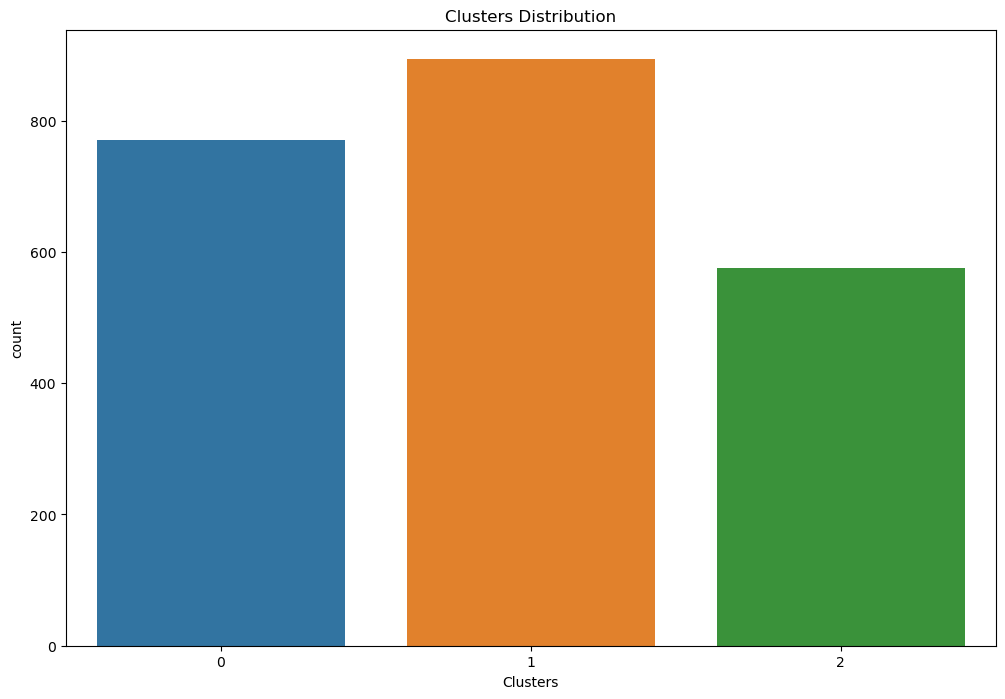

In [1267]:
#  distribution of cluster
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Clusters'])
plt.title('Clusters Distribution')
plt.show()

e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


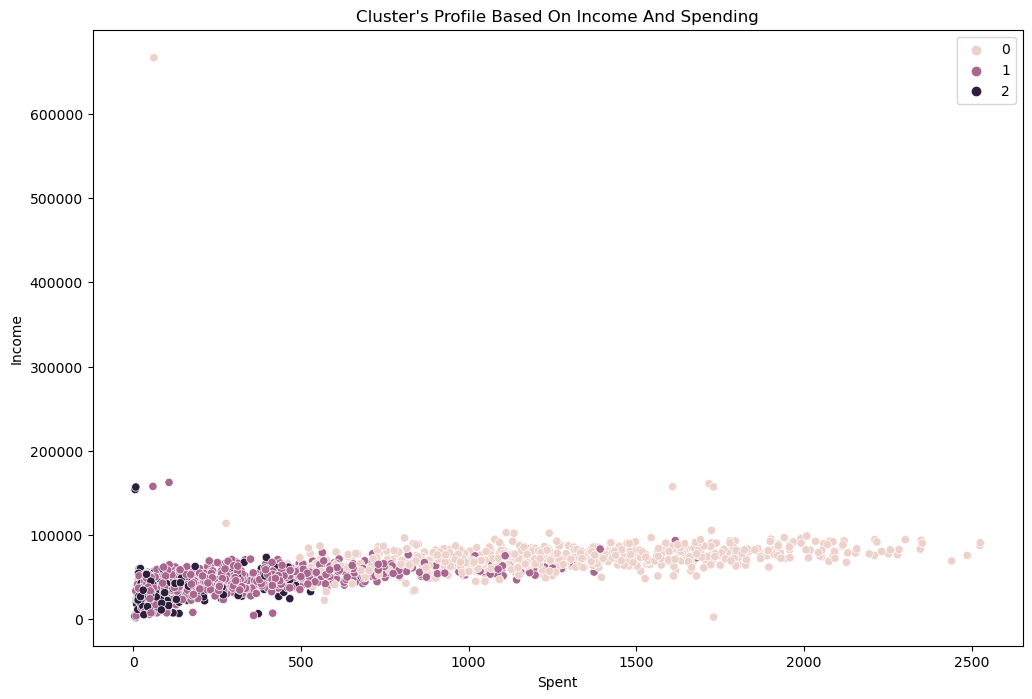

In [1268]:
# profiling between income and spending cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()